<a href="https://colab.research.google.com/github/stephenebert/Springboard/blob/main/Springboard/Capstone/step2/data-exploration/explore_stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA: Stable Diffusion Image → Prompt

This notebook explores the Stable Diffusion dataset:

- **prompts.csv**: image ↔ prompt pairs  
- **images/**: sample PNGs  

**Import packages**

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from PIL import Image
from collections import Counter
import random
pd.set_option("display.max_colwidth", 100)

!git clone https://github.com/stephenebert/Springboard.git

%cd Springboard/Capstone/step2/data-exploration

Cloning into 'Springboard'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 113 (delta 23), reused 50 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (113/113), 6.83 MiB | 23.94 MiB/s, done.
Resolving deltas: 100% (23/23), done.
/content/Springboard/Capstone/step2/data-exploration/Springboard/Capstone/step2/data-exploration/Springboard/Capstone/step2/data-exploration/Springboard/Capstone/step2/data-exploration


**Upload data**

In [4]:
csv_path = Path("../data/stable_diffusion") / "prompts.csv"
df = pd.read_csv(csv_path)
print(f"Total samples: {len(df)}")
df.head()


Total samples: 7


,imgId,prompt
0,20057f34d,hyper realistic photo of very friendly and dystopian crater
1,227ef0887,"ramen carved out of fractal rose ebony, in the style of hudson river school"
2,92e911621,"ultrasaurus holding a black bean taco in the woods, near an identical cheneosaurus"
3,a4e1c55a9,a thundering retro robot crane inks on parchment with a droopy french bulldog
4,c98f79f71,"portrait painting of a shimmering greek hero, next to a loud frill-necked lizard"


**Playing with data outputs**

In [5]:
df #only has image id and the prompt columns, let's add a prompt length column e.g. the amount of strings required to make the prompt

,imgId,prompt
0,20057f34d,hyper realistic photo of very friendly and dystopian crater
1,227ef0887,"ramen carved out of fractal rose ebony, in the style of hudson river school"
2,92e911621,"ultrasaurus holding a black bean taco in the woods, near an identical cheneosaurus"
3,a4e1c55a9,a thundering retro robot crane inks on parchment with a droopy french bulldog
4,c98f79f71,"portrait painting of a shimmering greek hero, next to a loud frill-necked lizard"
5,d8edf2e40,"an astronaut standing on a engaging white rose, in the midst of by ivory cherry blossoms"
6,f27825b2c,"Kaggle employee Phil at a donut shop ordering all the best donuts, with a speech bubble that pro..."


In [6]:
df["prompt_len"] = df["prompt"].str.split().apply(len)
df

,imgId,prompt,prompt_len
0,20057f34d,hyper realistic photo of very friendly and dystopian crater,9
1,227ef0887,"ramen carved out of fractal rose ebony, in the style of hudson river school",14
2,92e911621,"ultrasaurus holding a black bean taco in the woods, near an identical cheneosaurus",13
3,a4e1c55a9,a thundering retro robot crane inks on parchment with a droopy french bulldog,13
4,c98f79f71,"portrait painting of a shimmering greek hero, next to a loud frill-necked lizard",13
5,d8edf2e40,"an astronaut standing on a engaging white rose, in the midst of by ivory cherry blossoms",16
6,f27825b2c,"Kaggle employee Phil at a donut shop ordering all the best donuts, with a speech bubble that pro...",23


In [18]:
df['prompt_len']

,prompt_len
0,9
1,14
2,13
3,13
4,13
5,16
6,23


In [31]:
row

,0
imgId,20057f34d
prompt,hyper realistic photo of very friendly and dystopian crater
prompt_len,9


**Let's plot a histogram**

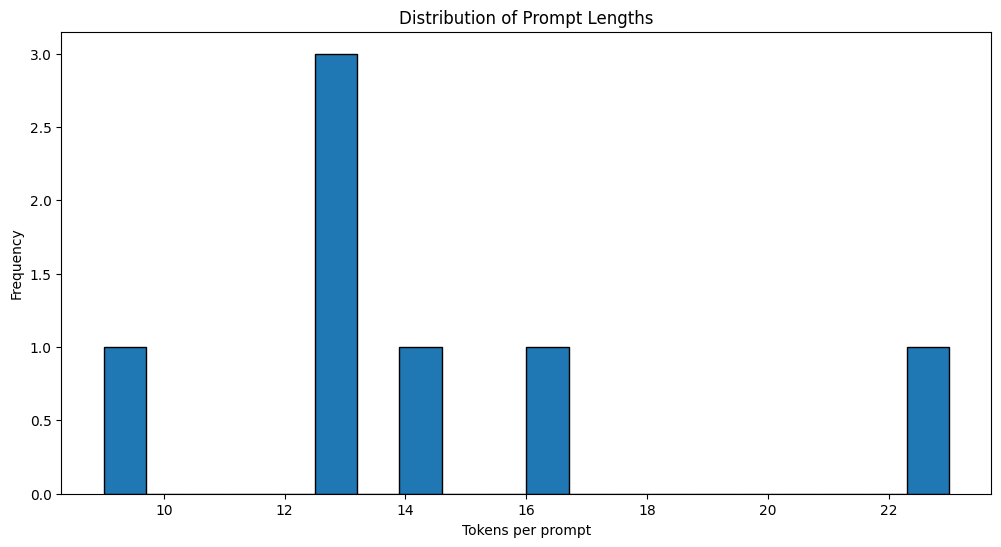

In [48]:
plt.figure(figsize=(12,6))
plt.hist(df["prompt_len"], bins = 20,  edgecolor="black")
plt.title("Distribution of Prompt Lengths")
plt.xlabel("Tokens per prompt")
plt.ylabel("Frequency")
plt.show()


Example #1: Kaggle employee Phil at a donut shop ordering all the best donuts, with a speech bubble that proclaims "Donuts. It's what's for dinner!"



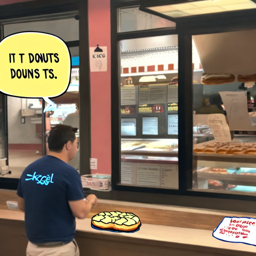

Example #2: ultrasaurus holding a black bean taco in the woods, near an identical cheneosaurus



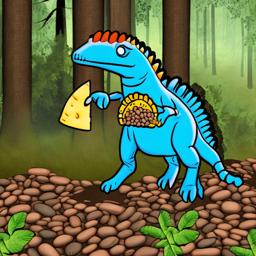

Example #3: ramen carved out of fractal rose ebony, in the style of hudson river school



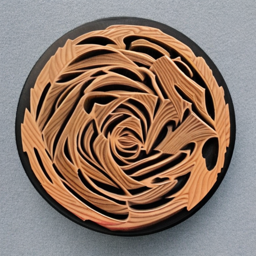

Example #4: a thundering retro robot crane inks on parchment with a droopy french bulldog



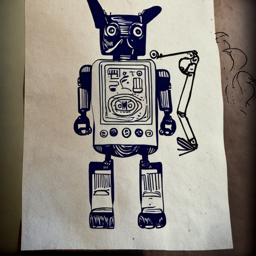

Example #5: hyper realistic photo of very friendly and dystopian crater



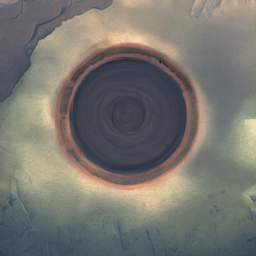

In [34]:
# Show 5 random image→prompt examples, numbered 1–5
samples = df.sample(5, random_state=0)

for i, (_, row) in enumerate(samples.iterrows(), start=1):
    img_file = Path("../data/stable_diffusion/images") / f"{row['imgId']}.png"
    print(f"Example #{i}: {row['prompt']}\n")
    display(Image.open(img_file).resize((256,256)))

**Check for missing or duplicate prompts/images**

In [32]:
print("Null prompts:", df["prompt"].isna().sum())
print("Duplicate image IDs:", df["imgId"].duplicated().sum())

Null prompts: 0
Duplicate image IDs: 0


**Top 20 most common words**

In [44]:
#useful to use the Counter() data structure to count the frequencies also remove the punctuations
tokens = Counter(t.lower().strip(".,!?-") for p in df["prompt"] for t in p.split())
pd.DataFrame(tokens.most_common(20), columns=["token","count"])

,token,count
0,a,8
1,of,5
2,the,4
3,in,3
4,rose,2
5,an,2
6,on,2
7,with,2
8,hyper,1
9,realistic,1


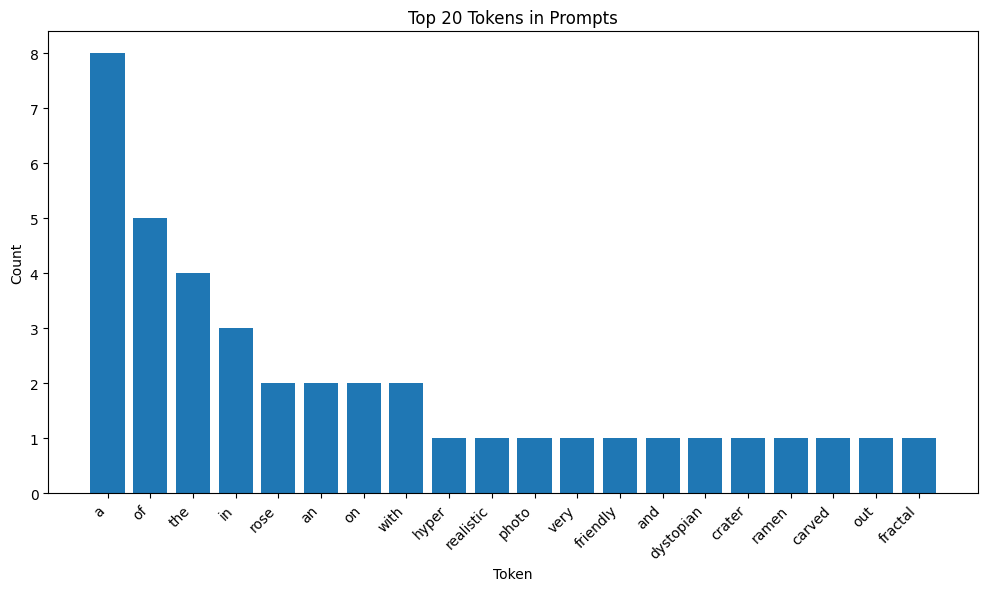

In [47]:
tf_df = pd.DataFrame(tokens.most_common(20), columns=["token","count"])

plt.figure(figsize=(12,6))
plt.bar(tf_df["token"], tf_df["count"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 20 Tokens in Prompts")
plt.xlabel("Token")
plt.ylabel("Count")
plt.show()

**Unique token count**

In [45]:
len(tokens)

81